# Variaciones del mismo digito

### En este notebook se observan distintas reconstrucciones del mismo dígito 

#### Datos
Se usaron los datos de MNIST para entrenar los modelos y visualizar las variaciones por dígito (genericamente clase). 

In [10]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(),"../..")))
from models.cVAE import CVAE
from keras.models import load_model
from Datos.Data_acq import get_mnist_data
#import Data_acq as data
import matplotlib.pyplot as plt
import importlib
from custom_layers.Sampling import Sampling

In [11]:
import importlib
#importlib.reload(data)
x_train, x_test,x_val ,y_train, y_test,y_val, x_train_1, y_train_1 = get_mnist_data()


Usando mnist como dataset


#### Modelo

Se usaron los modelos de diminesiones 128_2 y 256_128 (intermedia y latente respectivamente) para visualizar.

In [12]:
#128_2
encoder_0 = load_model("../../modelos_entrenados/encoders/en_int_128_lat_2_mnist.keras", custom_objects={"Sampling": Sampling})
decoder_0 = load_model("../../modelos_entrenados/decoders/de_int_128_lat_2_mnist.keras")

#256_128
encoder_1 = load_model("../../modelos_entrenados/encoders/en_int_256_lat_128_mnist.keras", custom_objects={"Sampling": Sampling})
decoder_1 = load_model("../../modelos_entrenados/decoders/de_int_256_lat_128_mnist.keras")


cvae_0 = CVAE(encoder=encoder_0,decoder=decoder_0,original_dim=28*28,beta=1)
cvae_1 = CVAE(encoder=encoder_1,decoder=decoder_1,original_dim=28*28,beta=1)


## Visualizaciones: 
Variaciones por dígito de cvae_0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


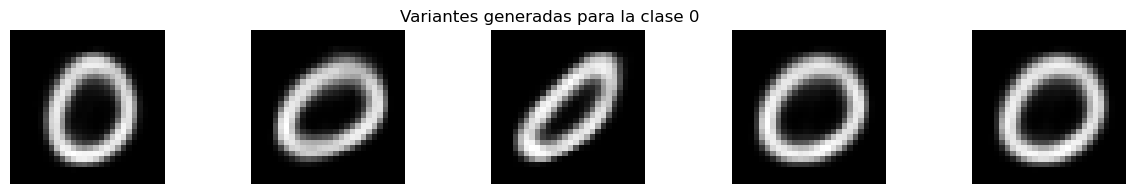

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


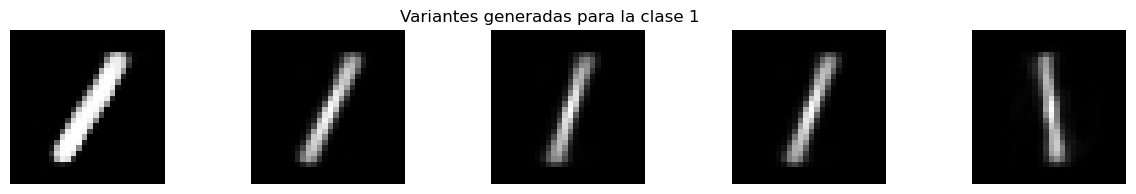

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


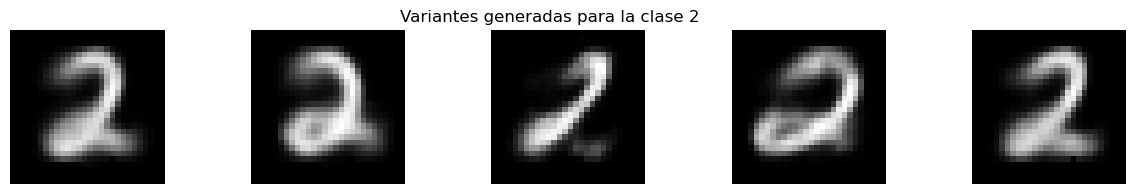

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


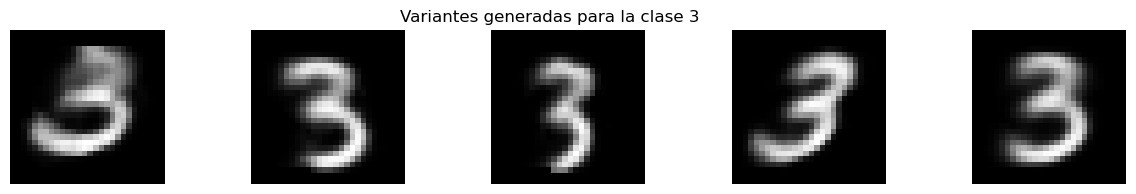

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


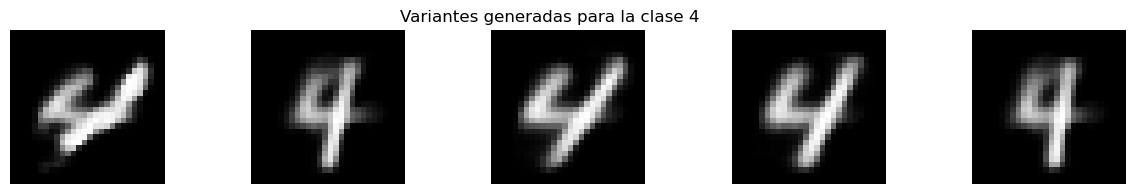

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


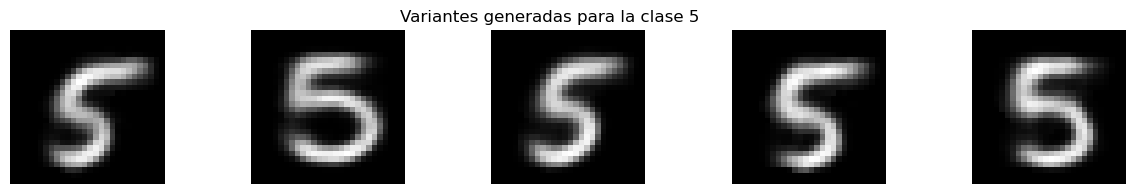

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


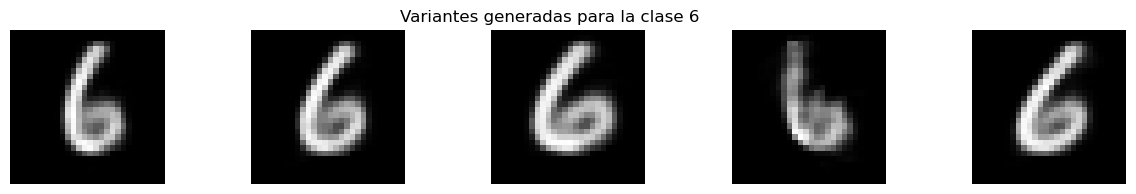

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


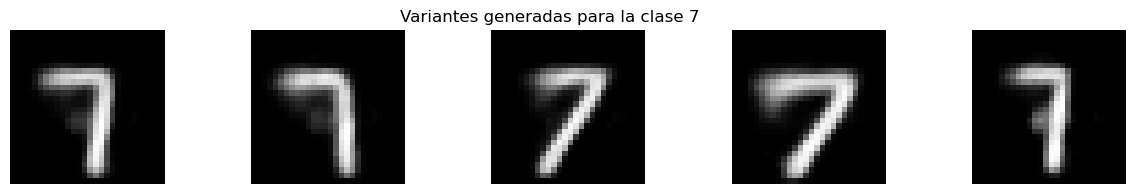

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


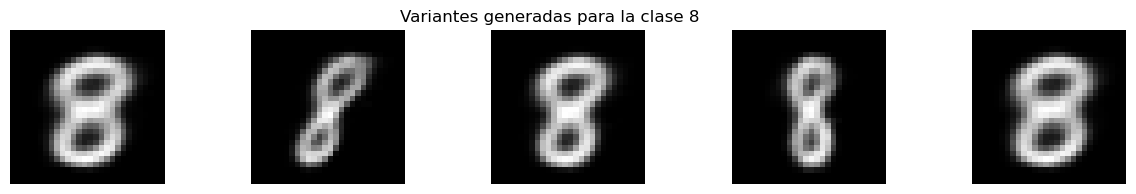

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


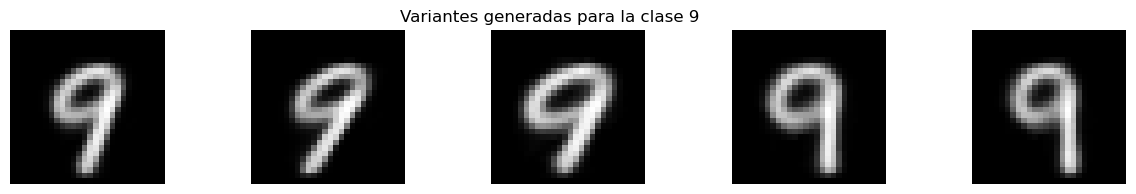

In [13]:
import visualizaciones.visualizar as vis
for i in range(10):
    vis.variantes(cvae_0,condicion_id=i,num_variantes=5)
    
    '''
    buscar coordenadas del espacio lantente que generarn las variaciones del mismo digito. 
    
    ''' 

Variaciones por dígito de cvae_1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


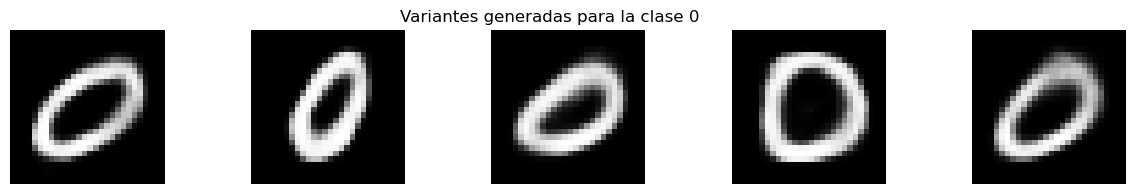

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


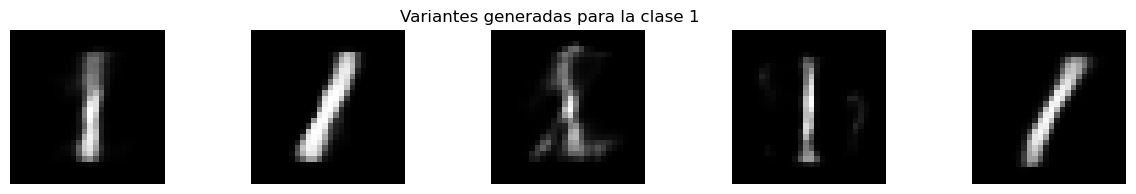

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


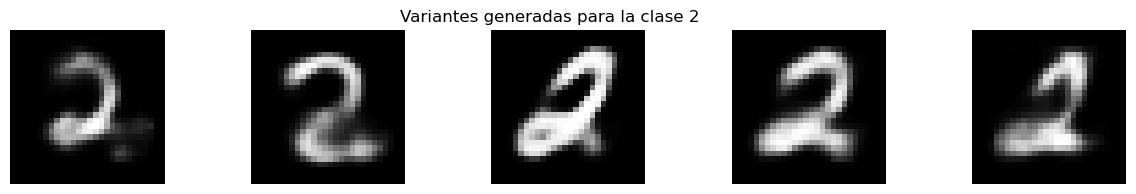

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


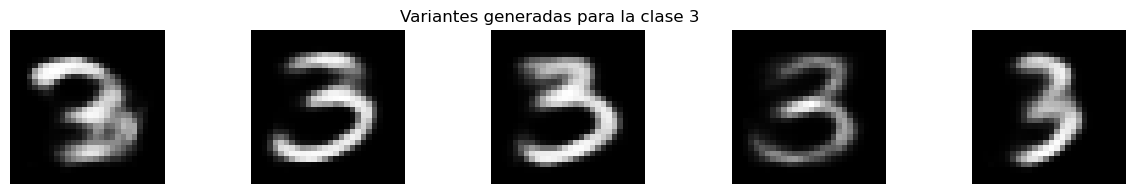

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


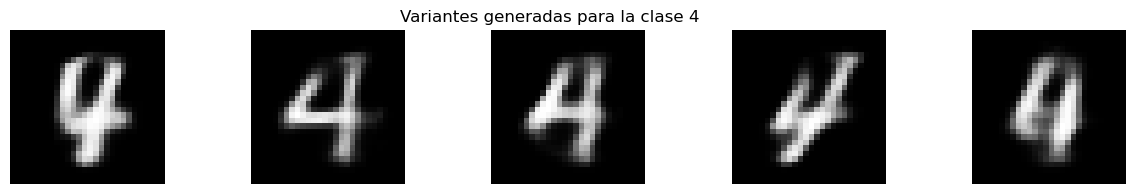

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


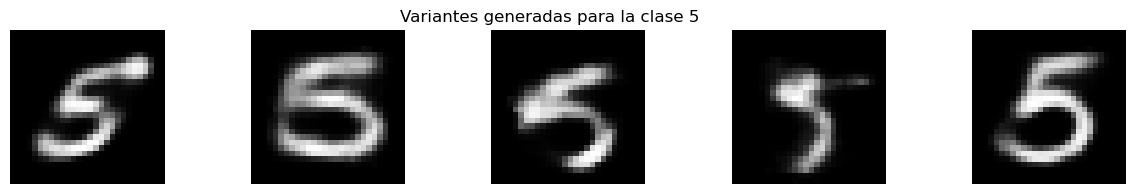

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


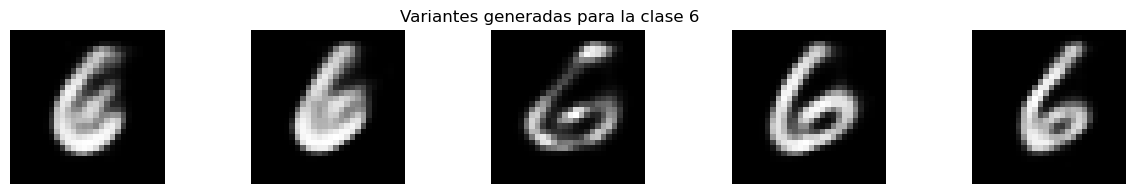

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


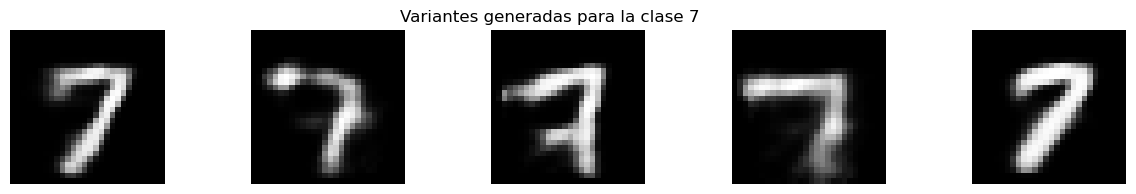

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


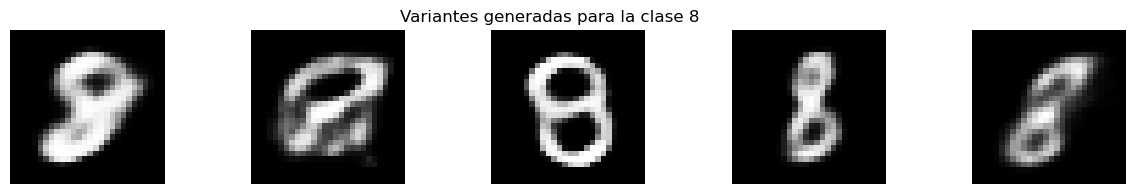

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


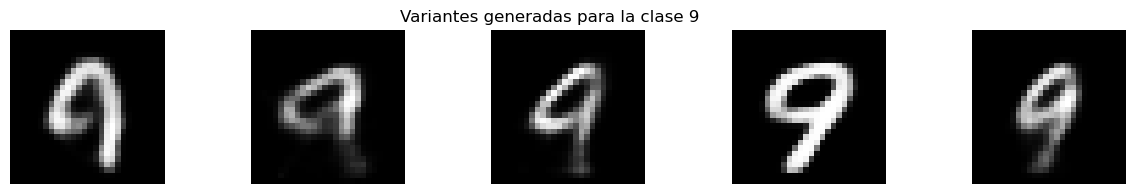

In [14]:

for i in range(10):
    vis.variantes(cvae_1,condicion_id=i,num_variantes=5)
    

Para ambos modelos parece haber una buena reconstruccion de dígitos. Bastante peor en el caso del modelo cvae_1

## Condiciones anómalas
condición en el decoder y enconder en 0 o aleatoreo

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


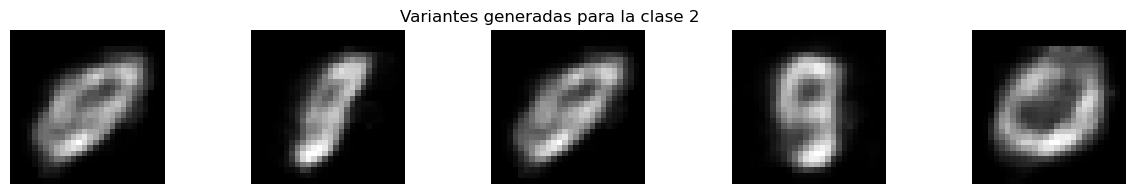

In [15]:
import visualizaciones.visualizar as vis
import importlib
import numpy as np
importlib.reload(vis)
num_variantes=5
custom_condition = np.zeros(shape=(num_variantes,10))
#custom_condition = np.random.uniform(0,1,size=(num_variantes,10))
'''
1) probar poner 0s al encoder.

2) entrenar un encoder sin clases en la entrada (quizas ponerle 0 en la entrada, sino cambiar 
                                                la arquitectura para que no tenga condicion. Verficar si es lo mismo)


'''
print(custom_condition)
vis.variantes(cvae=cvae_0,condicion_id=2,num_variantes=num_variantes,custom_condition = custom_condition)

En ambos casos se observan figuras caoticas, se aprecia cierta estructura pero no es posible atribuir una clase a las imagenes  

Metricas

In [16]:
import numpy as np
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
from collections import defaultdict

def evaluar_reconstruccion_por_clase(cvae, x_test, y_test, metric='mse'):
    """
    Evalúa la calidad de reconstrucción para cada clase.
    
    Args:
        cvae: modelo CVAE entrenado
        x_test: imágenes de prueba (shape: [N, 28, 28])
        y_test: etiquetas one-hot (shape: [N, 10])
        metric: 'mse' o 'bce'
    
    Returns:
        dict: promedio del error por clase
    """
    errores = defaultdict(list)

    for i in tqdm(range(len(x_test))):
        x = x_test[i:i+1]               # (1, 28, 28)
        y = y_test[i:i+1]               # (1, 10)

        # Codificar
        z_mean, _, z = cvae.encoder.predict([x, y],verbose=0)
        # Decodificar
        x_recon = cvae.decoder.predict([z, y],verbose=0)

        # Flatten para comparar
        x_flat = x.flatten()
        x_recon_flat = x_recon.flatten()

        if metric == 'mse':
            error = mean_squared_error(x_flat, x_recon_flat)
        elif metric == 'bce':
            import tensorflow.keras.losses as losses
            error = losses.binary_crossentropy(x_flat, x_recon_flat).numpy().mean()

        clase = np.argmax(y)
        errores[clase].append(error)

    # Promedio por clase
    resultados = {clase: np.mean(errores[clase]) for clase in errores}
    return resultados


Se usaron 1000 imagenes del dataset MNIST para evaluar el error de reconstrucción por dígito de cada modelo. 
Se usan las imagenes originales y la reconstrución para calcular el error cuadratico medio entre ambas figuras.

In [17]:
resultados_0 = evaluar_reconstruccion_por_clase(cvae_0, x_test[0:1000], y_test[0:1000], metric='mse')
resultados_1 = evaluar_reconstruccion_por_clase(cvae_1, x_test[0:1000], y_test[0:1000], metric='mse')

for clase, error in sorted(resultados_0.items()):
    print(f"CVAE(128 2) Dígito {clase}: error promedio = {error:.3f}")

for clase, error in sorted(resultados_1.items()):
    print(f"CVAE(256 128) Dígito {clase}: error promedio = {error:.3f}")



100%|██████████| 1000/1000 [03:47<00:00,  4.39it/s]

CVAE(128 2) Dígito 0: error promedio = 0.038
CVAE(128 2) Dígito 1: error promedio = 0.010
CVAE(128 2) Dígito 2: error promedio = 0.048
CVAE(128 2) Dígito 3: error promedio = 0.042
CVAE(128 2) Dígito 4: error promedio = 0.036
CVAE(128 2) Dígito 5: error promedio = 0.041
CVAE(128 2) Dígito 6: error promedio = 0.037
CVAE(128 2) Dígito 7: error promedio = 0.030
CVAE(128 2) Dígito 8: error promedio = 0.047
CVAE(128 2) Dígito 9: error promedio = 0.029
CVAE(256 128) Dígito 0: error promedio = 0.023
CVAE(256 128) Dígito 1: error promedio = 0.009
CVAE(256 128) Dígito 2: error promedio = 0.028
CVAE(256 128) Dígito 3: error promedio = 0.026
CVAE(256 128) Dígito 4: error promedio = 0.023
CVAE(256 128) Dígito 5: error promedio = 0.026
CVAE(256 128) Dígito 6: error promedio = 0.024
CVAE(256 128) Dígito 7: error promedio = 0.021
CVAE(256 128) Dígito 8: error promedio = 0.031
CVAE(256 128) Dígito 9: error promedio = 0.020


## Espacio latente de ambos modelos

C:\Users\galan\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


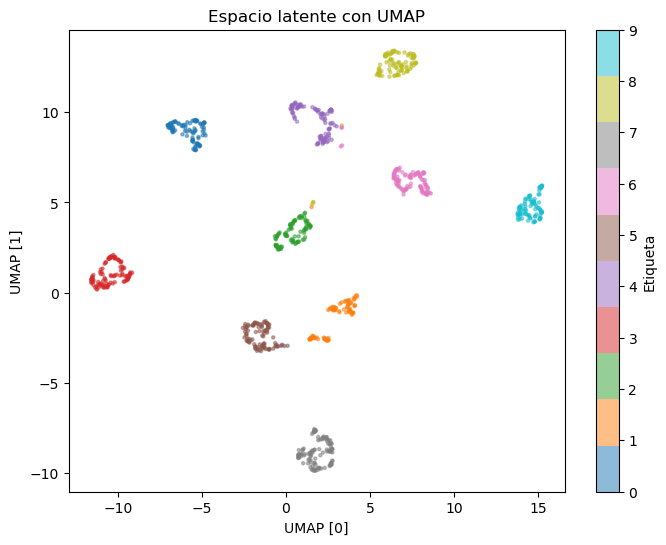

C:\Users\galan\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


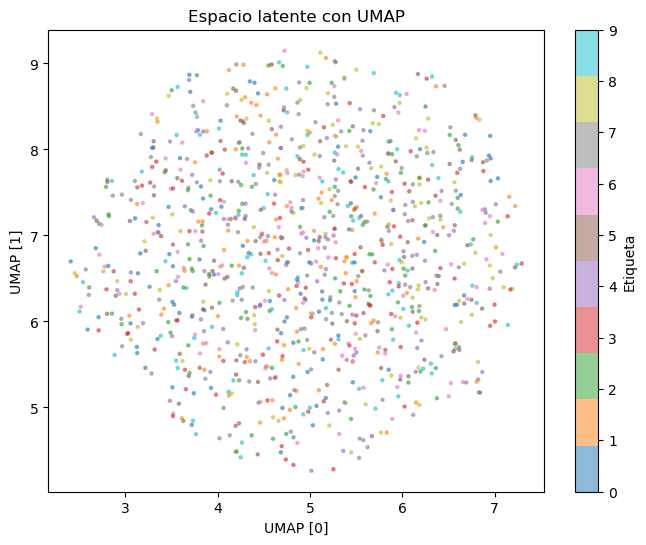

In [18]:
import visualizaciones.visualizar as vis
import tensorflow as tf
val_dataset = tf.data.Dataset.from_tensor_slices(((x_val, y_val), x_val))
vis.latent_space_umap(cvae_0,val_dataset,1000,save_path="esapacio_latente_dim_2.png")
vis.latent_space_umap(cvae_1,val_dataset,1000,save_path="esapacio_latente_dim_128.png")


Se pueden observar clusters bien definidos en el primer modelo, no así en el segundo (peores reconstrucciones)

In [19]:
import matplotlib.pyplot as plt

# Tus datos

def plot_error(resultados, ruta):
    valores = list(resultados.values())
    claves = list(resultados.keys())

    # Graficar barras
    bars = plt.bar(claves, valores)

    # Etiquetas encima de cada barra
    for i, bar in enumerate(bars):
        altura = bar.get_height()
        color_fondo = bar.get_facecolor()
        
        # Elegir blanco o negro según luminosidad del color de la barra
        r, g, b, _ = color_fondo
        color_texto = 'black'
        
        plt.text(
            bar.get_x() + bar.get_width()/2,   # centrado horizontal
            altura + 0.0015,                    # un poco abajo del tope de la barra
            f"{valores[i]:.3f}",
            ha='center', va='top',
            color=color_texto, fontsize=10
        )

    plt.xlabel("Dígito")
    plt.ylabel("Error de reconstrucción [MSE]")
    plt.title("Reconstrucción promedio por clase")
    plt.tight_layout()
    plt.savefig(f"{ruta}.png")
    plt.show()


'''
quizas el error tiene que ver con la variabilidad de cada dígito ("mas formas de dibujar un 8 que mas formas de dibjuar un 1")
¿Como aprovehcar esto para mejorar el aprendizaje?
tal vez se pueda ponderar la loss de reconstruccion en funcion del dígito 
coeficinetes (al principio en 1)->una epoca-> validacion comparando contra estos valores-> ajuste-> epocas---> se "aplana"  este grafico 
el error.
'''


'\nquizas el error tiene que ver con la variabilidad de cada dígito ("mas formas de dibujar un 8 que mas formas de dibjuar un 1")\n¿Como aprovehcar esto para mejorar el aprendizaje?\ntal vez se pueda ponderar la loss de reconstruccion en funcion del dígito \ncoeficinetes (al principio en 1)->una epoca-> validacion comparando contra estos valores-> ajuste-> epocas---> se "aplana"  este grafico \nel error.\n'

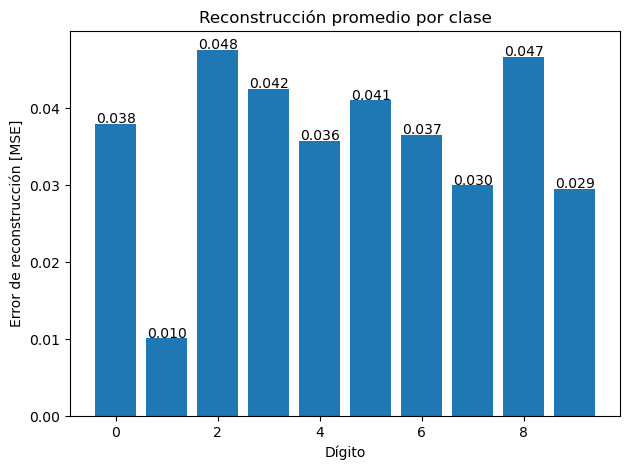

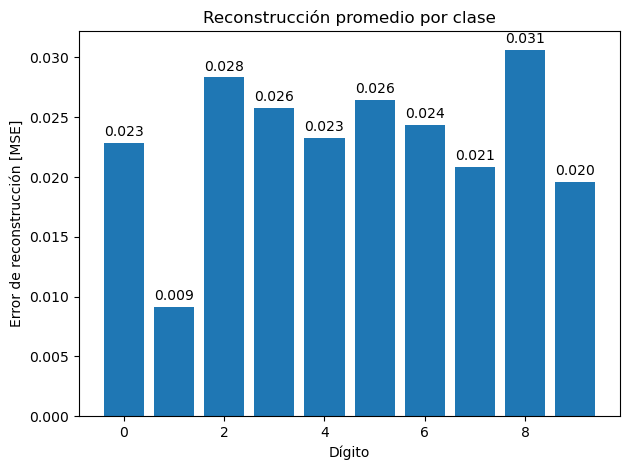

In [20]:
plot_error(resultados=resultados_0,ruta="128_2_MSE_variaciones")
plot_error(resultados=resultados_1,ruta="256_128_MSE_variaciones")

Ambos modelos se comportan de maneras muy similiar, practicamente identicos. --> ¿Es necesario tener modelos tan grandes para esta tarea?
- El bajo error en la reconstrucción del dígito 1 ¿Tendra que ver con la poca "dispersión o variabilidad" para dibujar el número? --> El numero 2 y 8 son los que más error tienen, ¿Más formas de dibujar estos números?
